In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("clean_data.csv")
df.head(2)

,id_subject,fecha_nacimiento,fecha_muestra,analisis,resultado,glucosa,recuento_de_plaquetas,no_plaq,albumina,bilirrubina_directa,...,linfocitos_abs,monocitos_abs,neutrofilos_cayados_abs,neutrofilos_polisegmentados_abs,rdw,recuento_de_globulos_blancos,recuento_de_globulos_rojos,volumen_corpuscular_medio,edad,resultado_bin
0,000bd3f4aa39981d82c5b2cd4fe41bc7,2000-01-31 00:00:00,2024-03-11,PCR PARA DENGUE.,Positivo-DEN1,NaN,206.0,False,4.42,0.1,...,774.00,657.90,0.0,2360.70,12.5,3870.0,4100.0,91.5,24,Positivo
1,00201509ff6946619043c1e8f92db9d8,1980-12-18 00:00:00,2024-03-14,PCR PARA DENGUE.,Positivo-DEN1,90.1,130.0,False,4.40,0.1,...,768.22,568.05,0.0,4030.45,13.2,5410.0,4570.0,88.2,43,Positivo


In [3]:
bioqcols = df.columns[5:-2]
n = len(bioqcols)

In [4]:
n

31

# Null values

In [5]:
desc = df.describe(percentiles=[]).transpose()
desc["null_perc"] = (1 - desc["count"] / len(df)) * 100
desc.round(2).to_csv("basic_descriptive.csv")

# Correlation

<AxesSubplot:>

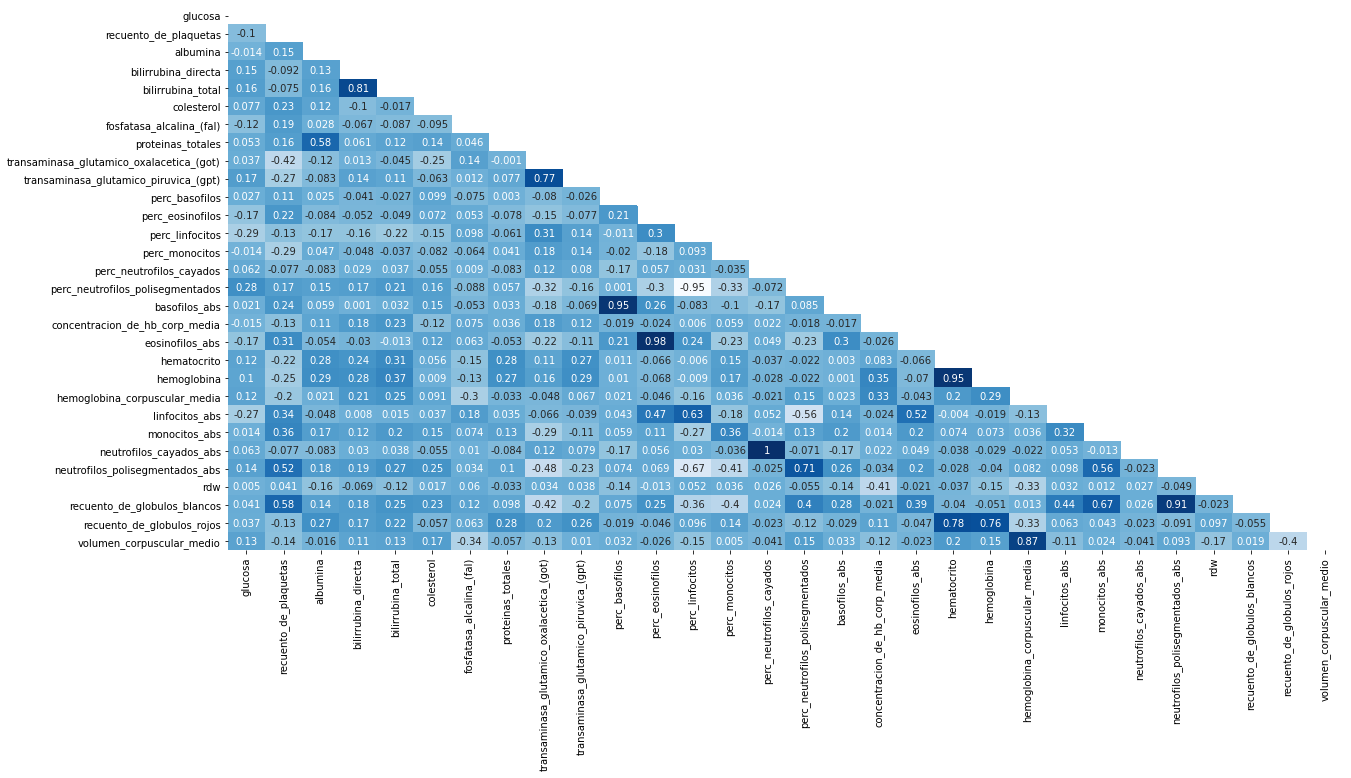

In [40]:
plt.figure(figsize=(20,10))
corr = df[bioqcols].corr("spearman", numeric_only=True).round(3)
matrix = np.triu(np.ones_like(corr))
sns.heatmap(corr, cbar=False, cmap="Blues", annot=True, mask=matrix)


In [7]:
topcorrs = pd.DataFrame(corr.unstack().to_dict(), index = ["corr"]).transpose().sort_values("corr")

In [8]:
topcorrs["abs_corr"] = topcorrs["corr"].abs()
topcorrs = topcorrs[topcorrs["corr"] < 1].sort_values("abs_corr", ascending=False).head(50)

In [9]:
topcorrs.reset_index().query("level_0 == 'recuento_de_plaquetas' ")

,level_0,level_1,corr,abs_corr
30,recuento_de_plaquetas,recuento_de_globulos_blancos,0.58,0.58
37,recuento_de_plaquetas,neutrofilos_polisegmentados_abs,0.52,0.52
48,recuento_de_plaquetas,transaminasa_glutamico_oxalacetica_(got),-0.42,0.42


In [10]:
df

,id_subject,fecha_nacimiento,fecha_muestra,analisis,resultado,glucosa,recuento_de_plaquetas,no_plaq,albumina,bilirrubina_directa,...,linfocitos_abs,monocitos_abs,neutrofilos_cayados_abs,neutrofilos_polisegmentados_abs,rdw,recuento_de_globulos_blancos,recuento_de_globulos_rojos,volumen_corpuscular_medio,edad,resultado_bin
0,000bd3f4aa39981d82c5b2cd4fe41bc7,2000-01-31 00:00:00,2024-03-11,PCR PARA DENGUE.,Positivo-DEN1,NaN,206.0,False,4.42,0.1,...,774.00,657.90,0.0,2360.70,12.5,3870.0,4100.0,91.5,24,Positivo
1,00201509ff6946619043c1e8f92db9d8,1980-12-18 00:00:00,2024-03-14,PCR PARA DENGUE.,Positivo-DEN1,90.1,130.0,False,4.40,0.1,...,768.22,568.05,0.0,4030.45,13.2,5410.0,4570.0,88.2,43,Positivo
2,002f9a1a1dcdd9650c3fd7829d167ccb,2006-11-01 00:00:00,2024-03-17,PCR PARA DENGUE.,Negativo,114.0,264.0,False,4.66,0.3,...,2364.88,1331.68,0.0,7576.80,12.8,11480.0,5050.0,85.7,17,Negativo
3,003b2732d132c0c8cbdabfc5488b83fd,2015-10-01 00:00:00,2024-03-21,PCR PARA DENGUE.,Positivo,NaN,237.0,False,4.70,0.2,...,654.50,748.00,0.0,7947.50,13.2,9350.0,4700.0,75.5,8,Positivo
4,0092c2d778476110c85ee7a9e383cacd,2003-03-13 00:00:00,2024-03-02,PCR PARA DENGUE.,Negativo,NaN,119.0,False,4.67,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,Negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,ff23a1b10617b5d76025e44058dc57eb,2016-01-14 00:00:00,2024-03-26,SEROLOGIA PARA DENGUE IGM,Negativo,NaN,288.0,False,NaN,NaN,...,1963.85,1221.75,0.0,5819.15,12.1,9050.0,4390.0,78.6,8,Negativo
1635,ffa85c2cbd6a4a7c2d7d6a5d52a85964,2003-06-05,2024-03-24,PCR PARA DENGUE.,Positivo-DEN1,NaN,113.0,False,4.47,0.1,...,936.00,390.00,0.0,1248.00,12.1,2600.0,4540.0,87.9,20,Positivo
1636,ffcb4f9852bc1f6728a7b95235fb3b82,1978-12-21 00:00:00,2024-03-03,PCR PARA DENGUE.,Negativo,NaN,186.0,False,4.57,0.2,...,1459.28,673.03,0.0,4088.50,12.6,6290.0,4590.0,93.7,45,Negativo
1637,ffe8fd781009a13194976c05f28f66ad,2007-11-14 00:00:00,2024-03-20,PCR PARA DENGUE.,Positivo,NaN,184.0,False,NaN,NaN,...,1001.16,931.12,0.0,2179.48,13.3,4120.0,5160.0,76.7,16,Positivo


# Stats Dengue vs Control

In [11]:
results = []
for column in bioqcols:
    df_test = df[df[column].notna()].copy()
    # Separate the data based on "resultado_bin"
    group_0 = df_test[df_test['resultado_bin'] != 'Positivo'][column]
    group_1 = df_test[df_test['resultado_bin'] == 'Positivo'][column]
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(group_0, group_1)
    
    # Append the results to the list
    results.append({
        'control_mean' : round(group_0.mean(),2),
        'case_mean' : round(group_1.mean(),2),
        'columns': column,
        'T_statistic': round(t_stat,1),
        'p_val': p_value,
        'p_val_bonf' : p_value * n,
        "subjects" : df_test.shape[0]
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

In [12]:
res = results_df.sort_values("p_val_bonf").dropna(how = "any")

res.to_csv("ttest.csv")

In [13]:
res

,control_mean,case_mean,columns,T_statistic,p_val,p_val_bonf,subjects
28,7913.09,4365.34,recuento_de_globulos_blancos,22.4,8.313457e-96,2.577172e-94,1455
26,5175.40,2741.82,neutrofilos_polisegmentados_abs,17.8,2.197753e-64,6.813034e-63,1454
1,240.79,179.09,recuento_de_plaquetas,17.2,5.577307e-60,1.728965e-58,1371
23,1884.15,1062.11,linfocitos_abs,16.6,1.222731e-56,3.790466e-55,1454
19,107.46,33.32,eosinofilos_abs,12.3,2.965008e-33,9.191525e-32,1454
24,713.43,512.80,monocitos_abs,12.0,1.642132e-31,5.090611e-30,1454
14,9.63,12.26,perc_monocitos,-11.2,6.756820e-28,2.094614e-26,1455
12,1.42,0.70,perc_eosinofilos,8.6,2.982459e-17,9.245624e-16,1455
9,29.43,46.58,transaminasa_glutamico_oxalacetica_(got),-7.4,2.834295e-13,8.786314e-12,1232
17,13.76,9.29,basofilos_abs,5.7,1.369752e-08,4.246231e-07,1454


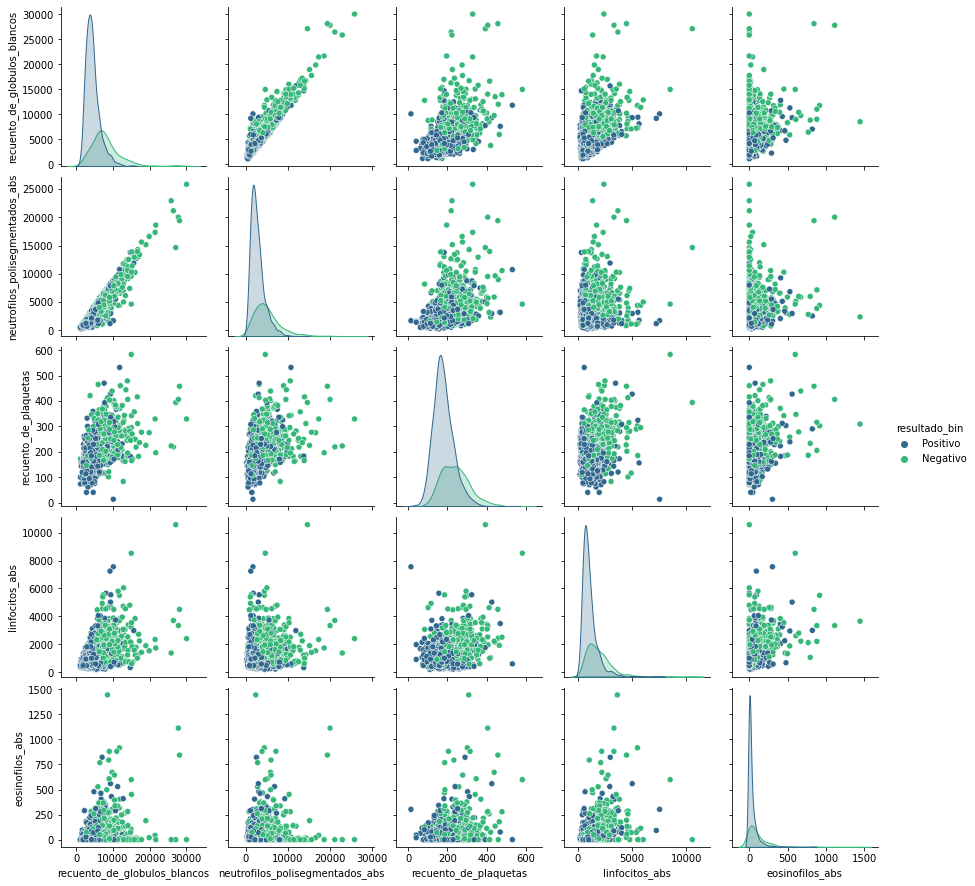

In [14]:
sns.pairplot(data = df,
             vars = res[res.p_val_bonf < 0.01]["columns"].to_list()[:5],
             kind = "scatter", 
             hue ="resultado_bin", palette='viridis')

# PCA

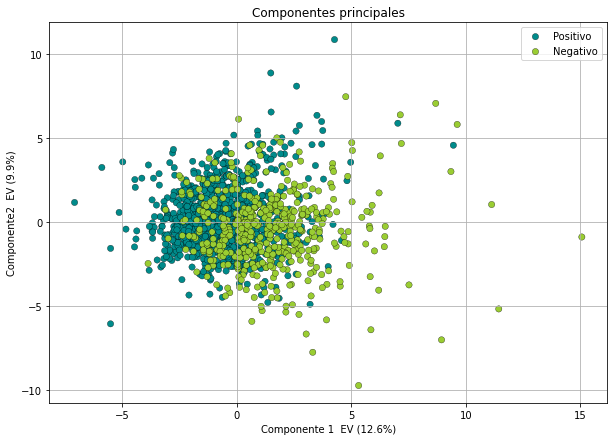

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

comps = (1,2)

# Assume df is your DataFrame and bioqcols is the list of columns to consider for PCA
# df = pd.read_csv('your_data.csv')  # Load your DataFrame

# Step 1: Standardize the data
pca_data = df[bioqcols]
pca_means = pca_data.mean()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data.fillna(pca_means))

# Step 2: Perform PCA
pca = PCA(n_components=20)  # We choose 2 components for visualization purposes
principal_components = pca.fit_transform(scaled_data)
ev = pca.explained_variance_ratio_
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f"pc_{i}" for i in range(1, principal_components.shape[1]+1)])

# Optionally, you can concatenate this with other columns of interest, e.g., target variable
 # Uncomment and define your target column if needed
targetcol = "resultado_bin"
pca_df = pd.concat([pca_df, df[targetcol]], axis=1)
pca_df["c"] = pca_df[targetcol].map({"Positivo": "darkcyan", 
                                  "Positivo-DEN1" : "blue",
                                  "Positivo-DEN2" : "lightblue",
                                  "Negativo" : "yellowgreen"})

# Step 3: Plot the results
plt.figure(figsize=(10, 7))

# If there's a target column, you can use it to color the points
unique_targets = df[targetcol].unique()
for target in unique_targets:
    indices = df[targetcol] == target
    plt.scatter(pca_df.loc[indices, f"pc_{comps[0]}"], pca_df.loc[indices, f"pc_{comps[1]}"],
                s=40, 
                label=target,
                c = pca_df[indices].c, linewidths = .3, edgecolors = "k",
                alpha = 1)
    
plt.title('Componentes principales')
plt.xlabel(f'Componente {comps[0]}  EV ({ev[comps[0]]*100:.1f}%)')
plt.ylabel(f'Componente{comps[1]}  EV ({ev[comps[1]]*100:.1f}%)')
plt.legend()  # Uncomment if you have labeled targets
plt.grid()
plt.show()


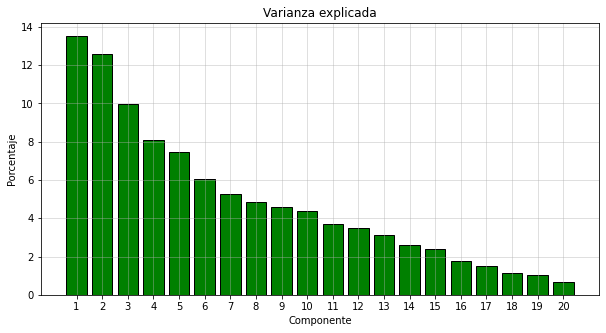

In [16]:
plt.figure(figsize = (10,5))
plt.title("Varianza explicada")
plt.bar([str(i) for i in range(1,len(ev)+1)],ev * 100, color = "green", edgecolor = "k")
plt.xlabel("Componente")
plt.ylabel("Porcentaje")
plt.grid(alpha = .5)

# Modelado predictivo

In [33]:
X = df[list(bioqcols)]
y = df['resultado_bin'].map({"Positivo" : 1, "Negativo": 0})

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import precision_score, recall_score, fbeta_score, make_scorer, f1_score
# Define custom F0.5 score
def fbscore(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=0.5)
import lightgbm


# Imputation methods
imputation_methods = {
    'none': None,
    'mean': SimpleImputer(strategy='mean'),
    'median' : SimpleImputer(strategy='median'),
    'mice': IterativeImputer(),
    
}

# Models and their hyperparameters
models = {
   'logistic_regression': LogisticRegression(),
   'decision_tree': DecisionTreeClassifier(),
   'lgbm': lightgbm.LGBMClassifier()
}

param_grids = {
    'logistic_regression': {
        'penalty': ['none','l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'lbfgs'],
        "max_iter" : [2000]
    },
    'decision_tree': {
        'max_depth': [1,2,3,4,5,6,8,10],
        'min_samples_leaf': [5, 10, 15,20, 25, 30, 50],
        'min_samples_split': [5, 10, 15, 20, 25,30, 40, 50]
    },
    'lgbm': {
        'n_estimators': [10, 30, 50, 100, 150, 200, 250, 300],
        'learning_rate': [0.00001, 0.01, 0.1, 0.2, 0.3, 0.5],
        'max_depth': [1, 3, 5, 10]
    }
}



scorers = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'fb': make_scorer(fbscore)
}

all_results = []



all_results = []

from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


fails = []

# Iterate over imputation methods
for imp_name, imputer in imputation_methods.items():
    X_train_imputed = imputer.fit_transform(X_train) if imputer else X_train.values
    X_test_imputed = imputer.fit_transform(X_test) if imputer else X_test.values

    # Iterate over models
    for model_name, model in models.items():
        try:
            grid_search = GridSearchCV(model, param_grids[model_name], scoring=scorers, refit='fb', cv=4, return_train_score=False)
            grid_search.fit(X_train_imputed, y_train)

            # Retrieve the cross-validation results
            cv_results = pd.DataFrame(grid_search.cv_results_)
            cv_results['model'] = model_name
            cv_results['model_object'] = grid_search
            cv_results['imputation'] = imp_name

            # Add test set evaluation for the best model
            y_pred = grid_search.predict(X_test_imputed)
            cv_results['precision_test'] = precision_score(y_test, y_pred)
            cv_results['recall_test'] = recall_score(y_test, y_pred)
            cv_results['f1_test'] = f1_score(y_test, y_pred)
            cv_results['fb_test'] = fbscore(y_test, y_pred)

            all_results.append(cv_results)

        except:
            fails.append(f"{model_name}; {imp_name}; {param_grids[model_name]} FAILED")

# Combine all results
all_results_df = pd.concat(all_results, ignore_index=True)


/home/santiago/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
32 fits failed out of a total of 32.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santiago/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santiago/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/santiago/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver

/home/santiago/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/santiago/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

/home/santiago/.local/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/santiago/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/santiago/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

/home/santiago/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
fails

["logistic_regression; none; {'penalty': ['none', 'l1', 'l2', 'elasticnet'], 'solver': ['liblinear', 'lbfgs'], 'max_iter': [2000]} FAILED",
 "decision_tree; none; {'max_depth': [1, 2, 3, 4, 5, 6, 8, 10], 'min_samples_leaf': [5, 10, 15, 20, 25, 30, 50], 'min_samples_split': [5, 10, 15, 20, 25, 30, 40, 50]} FAILED"]

In [36]:
# Select and display relevant columns
selected_columns = ["model", "model_object","fb_test","params", "std_test_fb","imputation", "precision_test","recall_test", "mean_test_fb"]
results_df = all_results_df[selected_columns]
results_df

,model,model_object,fb_test,params,std_test_fb,imputation,precision_test,recall_test,mean_test_fb
0,lgbm,"GridSearchCV(cv=4, estimator=LGBMClassifier(),...",0.859189,"{'learning_rate': 1e-05, 'max_depth': 1, 'n_es...",0.000362,none,0.84375,0.927039,0.742815
1,lgbm,"GridSearchCV(cv=4, estimator=LGBMClassifier(),...",0.859189,"{'learning_rate': 1e-05, 'max_depth': 1, 'n_es...",0.000362,none,0.84375,0.927039,0.742815
2,lgbm,"GridSearchCV(cv=4, estimator=LGBMClassifier(),...",0.859189,"{'learning_rate': 1e-05, 'max_depth': 1, 'n_es...",0.000362,none,0.84375,0.927039,0.742815
3,lgbm,"GridSearchCV(cv=4, estimator=LGBMClassifier(),...",0.859189,"{'learning_rate': 1e-05, 'max_depth': 1, 'n_es...",0.000362,none,0.84375,0.927039,0.742815
4,lgbm,"GridSearchCV(cv=4, estimator=LGBMClassifier(),...",0.859189,"{'learning_rate': 1e-05, 'max_depth': 1, 'n_es...",0.000362,none,0.84375,0.927039,0.742815
...,...,...,...,...,...,...,...,...,...
1483,lgbm,"GridSearchCV(cv=4, estimator=LGBMClassifier(),...",0.858421,"{'learning_rate': 0.5, 'max_depth': 10, 'n_est...",0.007804,mice,0.84739,0.905579,0.859141
1484,lgbm,"GridSearchCV(cv=4, estimator=LGBMClassifier(),...",0.858421,"{'learning_rate': 0.5, 'max_depth': 10, 'n_est...",0.006376,mice,0.84739,0.905579,0.858475
1485,lgbm,"GridSearchCV(cv=4, estimator=LGBMClassifier(),...",0.858421,"{'learning_rate': 0.5, 'max_depth': 10, 'n_est...",0.005366,mice,0.84739,0.905579,0.859525
1486,lgbm,"GridSearchCV(cv=4, estimator=LGBMClassifier(),...",0.858421,"{'learning_rate': 0.5, 'max_depth': 10, 'n_est...",0.006870,mice,0.84739,0.905579,0.859911


In [37]:
results_df["model_params"] = results_df.model + "_" + results_df.imputation + "_" + results_df.params.astype(str)

/tmp/ipykernel_125566/1672200987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["model_params"] = results_df.model + "_" + results_df.imputation + "_" + results_df.params.astype(str)


In [38]:
bb = pd.DataFrame()
for model in models:
    b = results_df.query(f"model =='{model}'").sort_values("mean_test_fb", ascending=False).head(1).transpose()
    b.columns = [model]
    bb = bb.merge(b, left_index = True, right_index=True) if not bb.empty else b
bb

,logistic_regression,decision_tree,lgbm
model,logistic_regression,decision_tree,lgbm
model_object,"GridSearchCV(cv=4, estimator=LogisticRegressio...","GridSearchCV(cv=4, estimator=DecisionTreeClass...","GridSearchCV(cv=4, estimator=LGBMClassifier(),..."
fb_test,0.836576,0.85456,0.859189
params,"{'max_iter': 2000, 'penalty': 'l1', 'solver': ...","{'max_depth': 3, 'min_samples_leaf': 15, 'min_...","{'learning_rate': 0.2, 'max_depth': 10, 'n_est..."
std_test_fb,0.012133,0.006422,0.013317
imputation,mean,mice,none
precision_test,0.81749,0.845528,0.84375
recall_test,0.922747,0.892704,0.927039
mean_test_fb,0.848204,0.864084,0.866578
model_params,"logistic_regression_mean_{'max_iter': 2000, 'p...","decision_tree_mice_{'max_depth': 3, 'min_sampl...","lgbm_none_{'learning_rate': 0.2, 'max_depth': ..."


In [70]:
bb.transpose()[["params","imputation","fb_test","precision_test","recall_test"]].transpose()

,logistic_regression,decision_tree,lgbm
params,"{'max_iter': 2000, 'penalty': 'l1', 'solver': ...","{'max_depth': 3, 'min_samples_leaf': 15, 'min_...","{'learning_rate': 0.2, 'max_depth': 10, 'n_est..."
imputation,mean,mice,none
fb_test,0.836576,0.85456,0.859189
precision_test,0.81749,0.845528,0.84375
recall_test,0.922747,0.892704,0.927039


In [218]:
bt = DecisionTreeClassifier(**bb["decision_tree"].params)
X_train_imputed = imputation_methods["mice"].fit_transform(X_train)
X_test_imputed = imputation_methods["mice"].transform(X_test)
bt.fit(X_train_imputed, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=15, min_samples_split=30)

In [235]:
y_preds = bt.predict(X_test_imputed)
y_preds_proba = [i[1] for i in bt.predict_proba(X_test_imputed)]

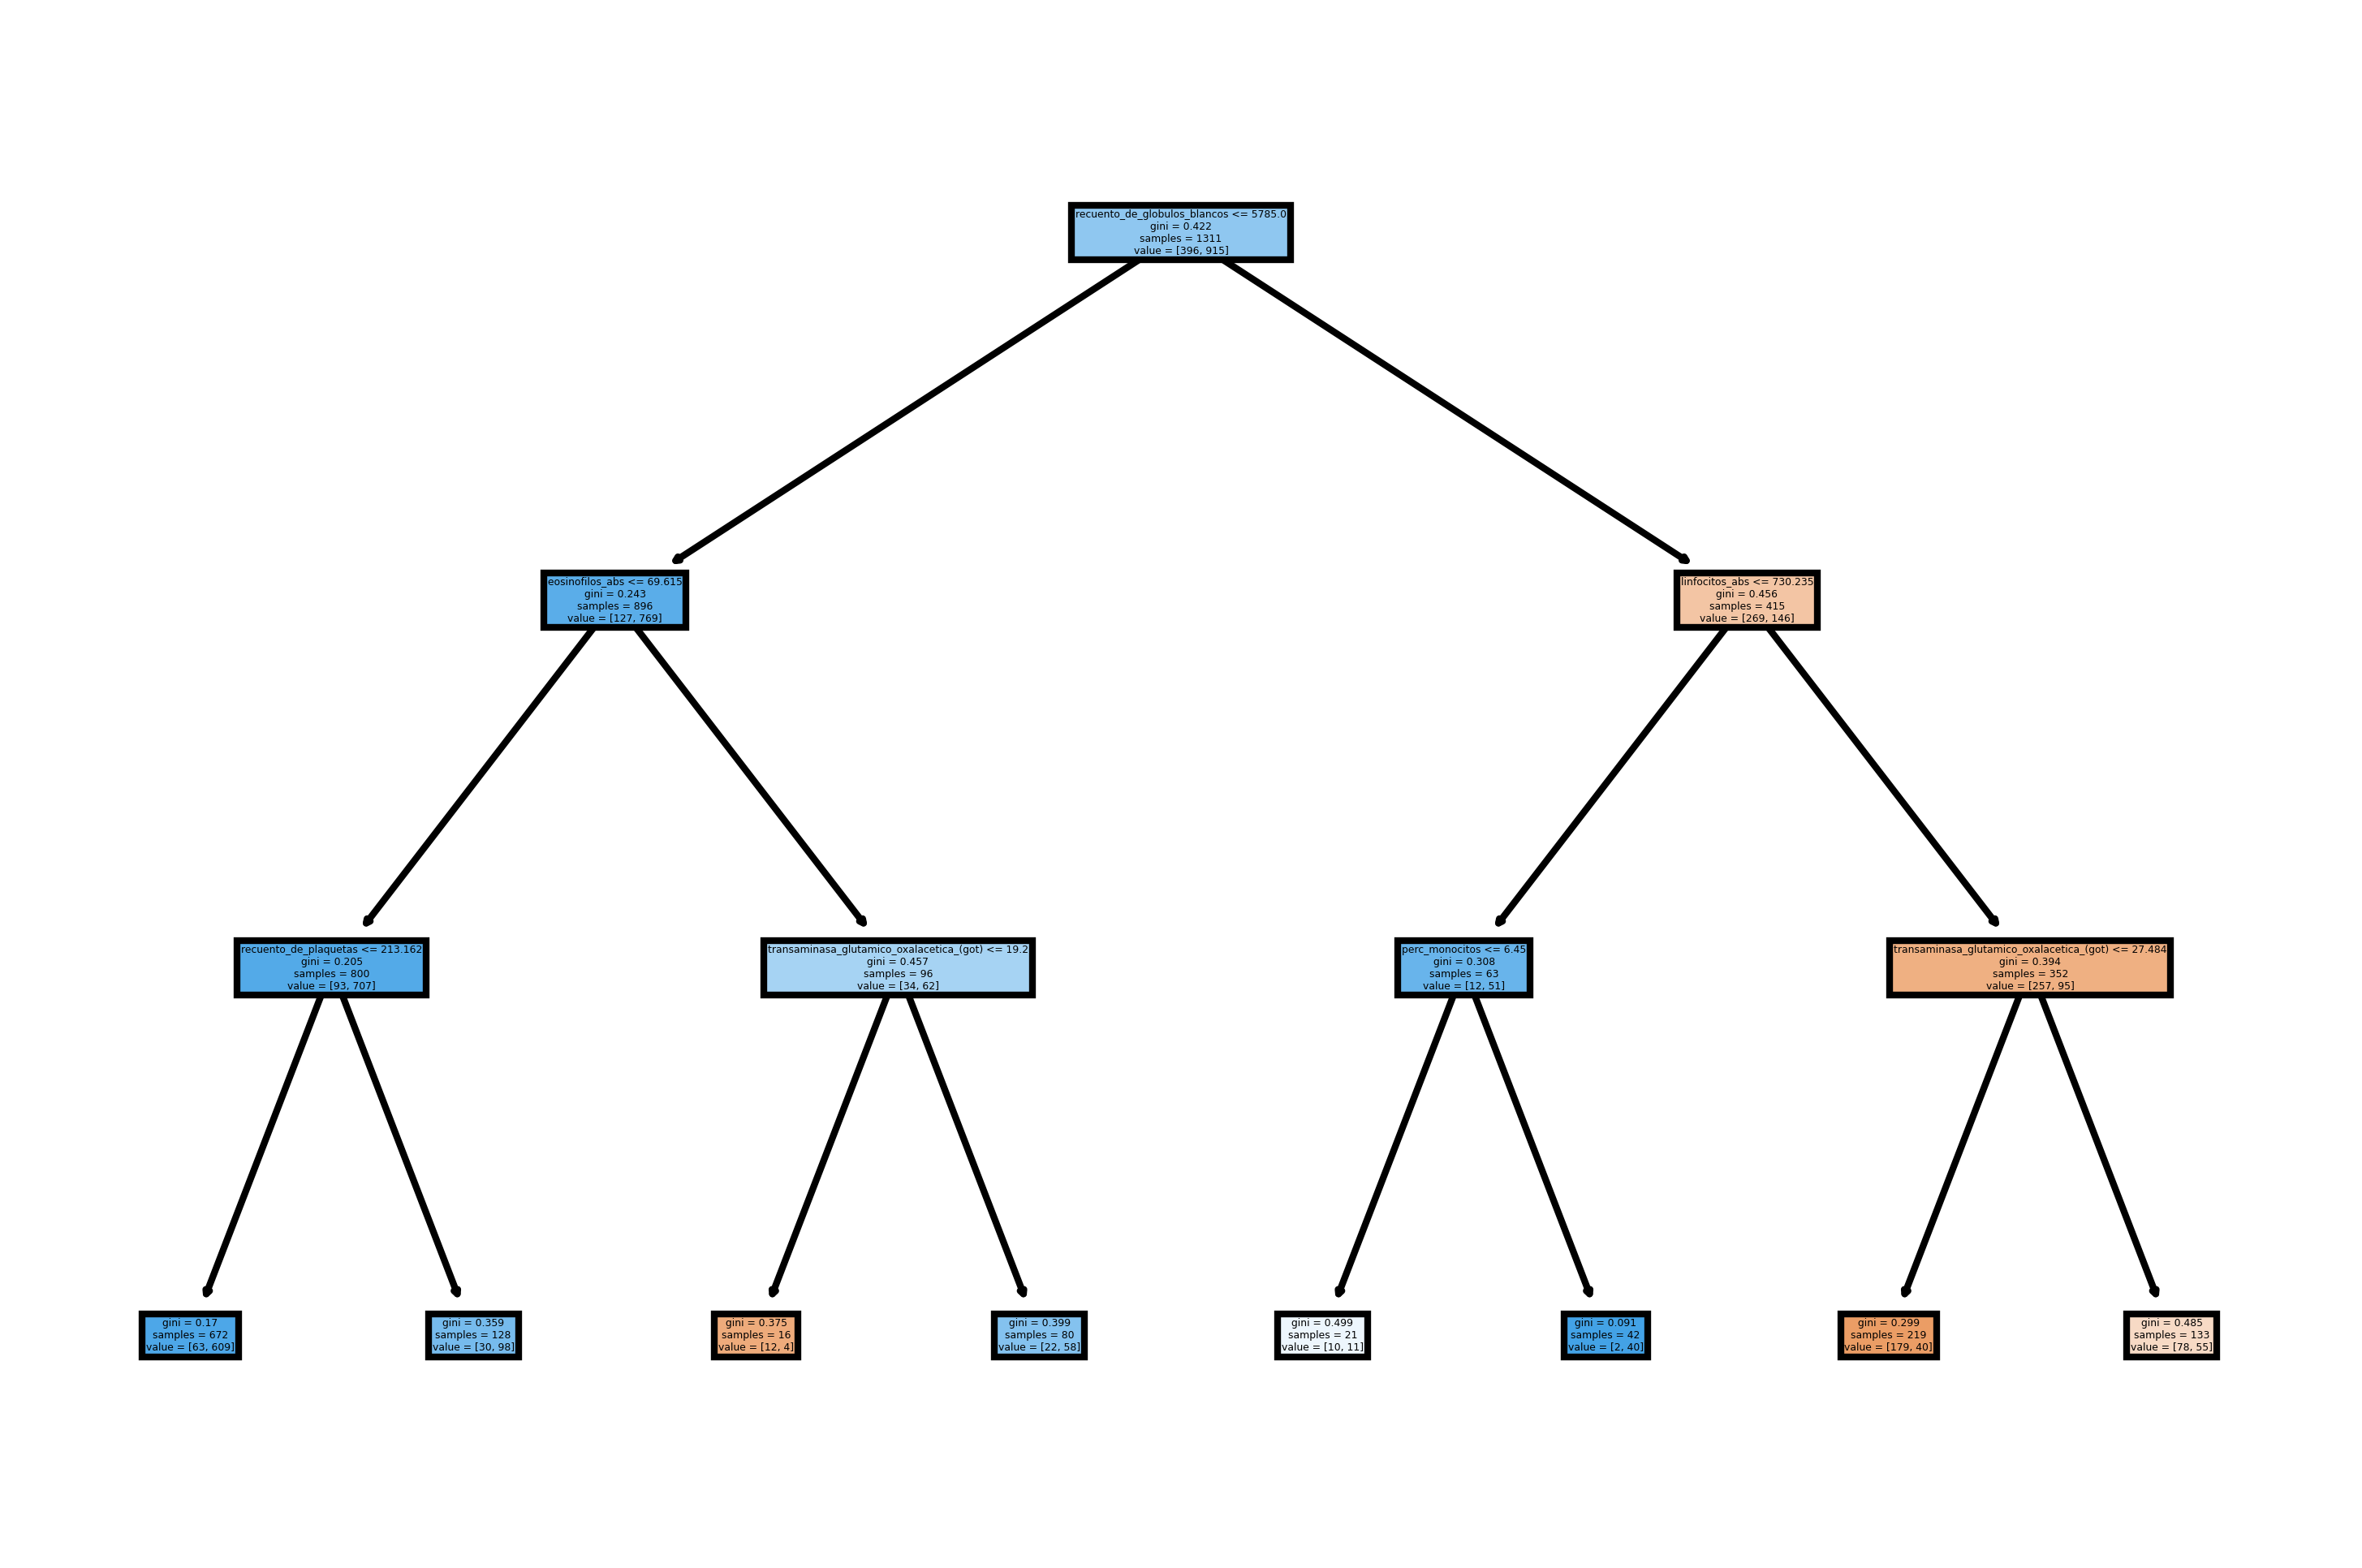

In [236]:
from sklearn.tree import plot_tree
plt.figure(dpi = 600)
plot_tree(bt, feature_names=X_train.columns, filled = True);

In [237]:
pd.DataFrame({"importances":bt.feature_importances_,
 "feature" : X_train.columns}).query("importances > 0").sort_values("importances", ascending = False) * 100

,importances,feature
28,69.101292,recuento_de_globulos_blancosrecuento_de_globul...
23,14.780732,linfocitos_abslinfocitos_abslinfocitos_abslinf...
9,7.047368,transaminasa_glutamico_oxalacetica_(got)transa...
19,4.608500,eosinofilos_abseosinofilos_abseosinofilos_abse...
14,2.442481,perc_monocitosperc_monocitosperc_monocitosperc...
1,2.019626,recuento_de_plaquetasrecuento_de_plaquetasrecu...


In [238]:
from sklearn.metrics import plot_roc_curve, roc_curve, plot_precision_recall_curve, auc
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

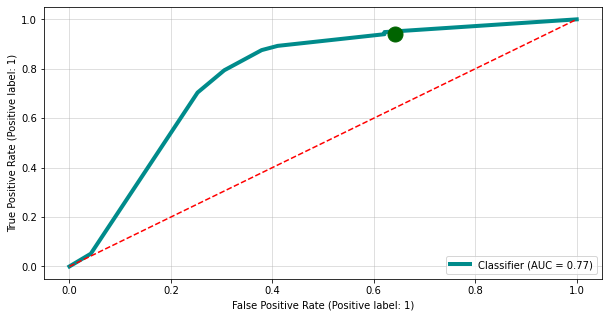

In [239]:
fig, ax = plt.subplots(figsize = (10,5))
RocCurveDisplay.from_predictions(y_test, y_preds_proba, ax = ax, linewidth = 4, color = "darkcyan")
plt.plot([0,1], [0,1], ls = "--", color = "r")
plt.plot([fpr[-3]],[tpr[-3]], ms = 15, marker = "o", color = "darkgreen", label = "default threshold")
plt.grid(alpha = .5)

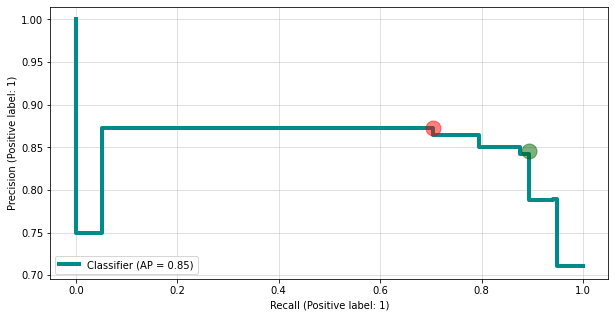

In [267]:
fig, ax = plt.subplots(figsize = (10,5))
PrecisionRecallDisplay.from_predictions(y_test, y_preds_proba, ax = ax, linewidth = 4, color = "darkcyan")
pr = bb[["decision_tree"]].loc[["precision_test","recall_test"]].values
plt.plot(pr[1], pr[0], ms = 15, marker = "o", color = "darkgreen", alpha = .5)

sugg_probas =[int(i > 0.8) for i in y_preds_proba]

plt.plot( recall_score(y_test, sugg_probas), precision_score(y_test, sugg_probas), ms = 15, alpha = .5, marker = "o", color = "red")

plt.grid(alpha = .5)

In [299]:
recall_score(y_test, sugg_probas), precision_score(y_test, sugg_probas), accuracy_score(y_test, sugg_probas)

(0.703862660944206, 0.8723404255319149, 0.7164634146341463)

In [298]:
from sklearn.metrics import accuracy_score

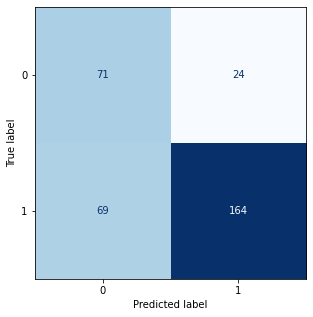

In [296]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, axs = plt.subplots(figsize = (5,5))
ConfusionMatrixDisplay.from_predictions(y_test, sugg_probas, cmap = "Blues", ax = axs, colorbar=False);

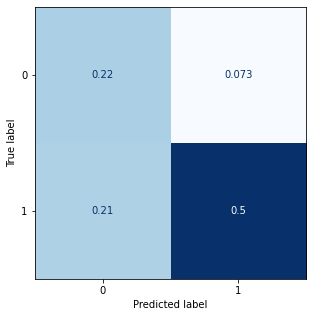

In [297]:
fig, axs = plt.subplots(figsize = (5,5))
ConfusionMatrixDisplay.from_predictions(y_test, sugg_probas, cmap = "Blues", ax = axs, colorbar=False, normalize="all")